In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
import warnings
from sklearn.svm import SVC
from sklearn import datasets, linear_model
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
shop = pd.read_csv("online_shoppers_intention.csv")

In [3]:
shop['Weekend'] = shop['Weekend'].map({False: 0, True: 1})
shop['Revenue'] = shop['Revenue'].map({False: 0, True: 1})
shop['Month'] = shop['Month'].map({'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12})
shop['VisitorType'] = shop['VisitorType'].map({'Returning_Visitor': 1, 'New_Visitor': 0})
shop.dropna(inplace = True)

In [4]:
Y = shop['Revenue']
shop.drop(['Revenue'], axis = 1, inplace = True)
X = shop

In [5]:
#Split the data into test and train set and do an 80% to 20% split
x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)

In [6]:
models = []
accuracy = []
f1 = []

<h1> Decision Tree Classifier </h1>

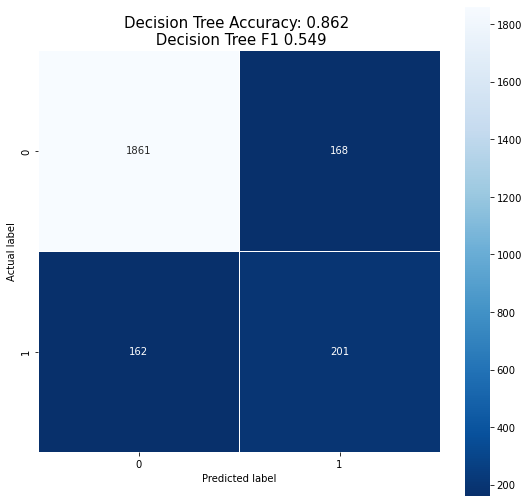

In [7]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
score = accuracy_score(predictions, y_test)
cm = metrics.confusion_matrix(y_test, predictions)
    
models.append('Decision Tree')
accuracy.append(round(score,3))
f1.append(round(f1_score(y_test, predictions),3))
                
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Decision Tree Accuracy: {round(score, 3)} \n Decision Tree F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

<h1> Decision Tree Classifier (with hyperparamters) </h1>

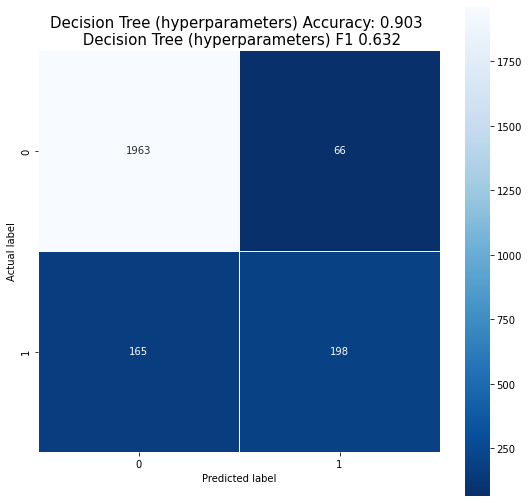

In [8]:
clf = DecisionTreeClassifier()

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [i for i in range(5)],
              'min_samples_split': [2,5,10,20]}

grid_search = GridSearchCV(clf, param_grid)           
grid_search.fit(x_train, y_train)

new_param = grid_search.best_params_

for item, key in new_param.items():
        new_param[item] = [key]

final_clf = GridSearchCV(clf, new_param)
final_clf.fit(x_train, y_train)
predictions = final_clf.predict(x_test)
score = accuracy_score(predictions, y_test)

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Decision Tree (hyperparameters) Accuracy: {round(score, 3)} \n Decision Tree (hyperparameters) F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

<h1> Random Forest Classifier </h1>

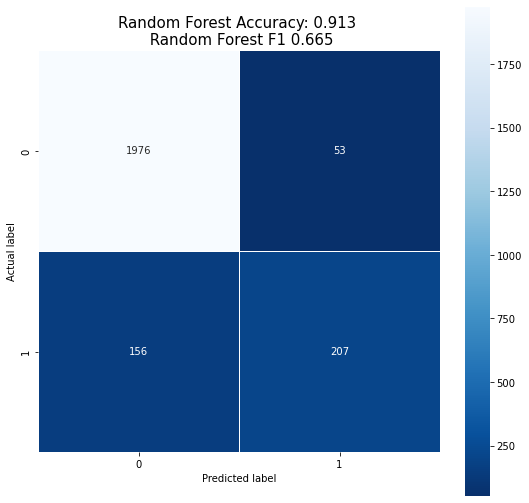

In [9]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
score = accuracy_score(predictions, y_test)
cm = metrics.confusion_matrix(y_test, predictions)

models.append('Random Forest')
accuracy.append(round(score,3))
f1.append(round(f1_score(y_test, predictions),3))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Random Forest Accuracy: {round(score, 3)} \n Random Forest F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

<h1> Random Forest Classifier (with hyperparameters) </h1>

In [10]:
clf = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'max_depth': [i for i in range(5)],
              'min_samples_split': [2,5,10,20]}

grid_search = GridSearchCV(clf, param_grid)           
grid_search.fit(x_train, y_train)

new_param = grid_search.best_params_

In [11]:
for item, key in new_param.items():
        new_param[item] = [key]

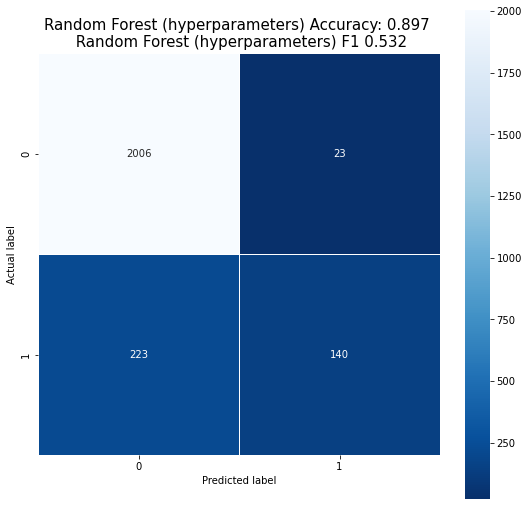

In [12]:
final_clf = GridSearchCV(clf, new_param)
final_clf.fit(x_train, y_train)
predictions = final_clf.predict(x_test)
score = accuracy_score(predictions, y_test)

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Random Forest (hyperparameters) Accuracy: {round(score, 3)} \n Random Forest (hyperparameters) F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

<h1> Logistic Regression </h1>

In [13]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)

# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)

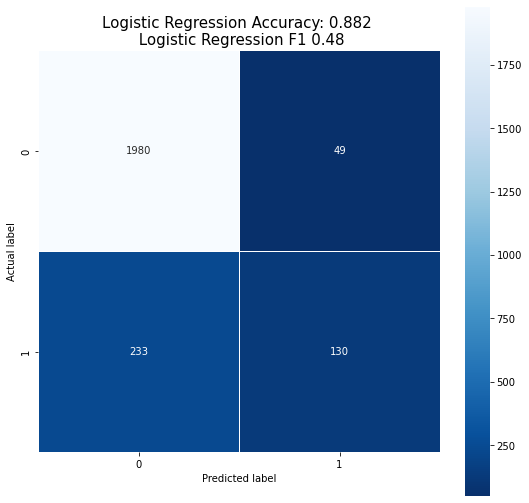

In [14]:
cm = metrics.confusion_matrix(y_test, predictions)

models.append('Logistic Regression')
accuracy.append(round(score,3))
f1.append(round(f1_score(y_test, predictions),3))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Logistic Regression Accuracy: {round(score, 3)} \n Logistic Regression F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

<h1> KNeighbors Classifier </h1>

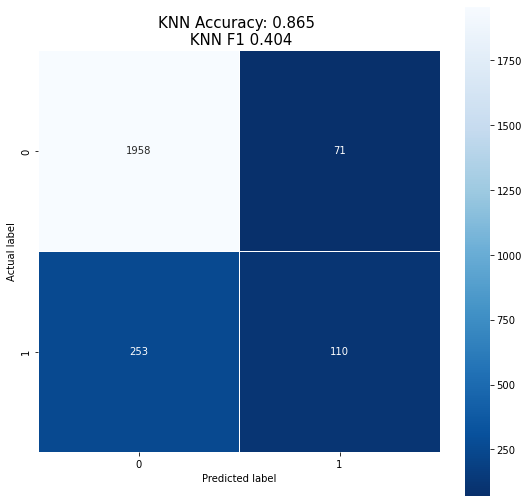

In [15]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
score = accuracy_score(predictions, y_test)
cm = metrics.confusion_matrix(y_test, predictions)

models.append('K-Nearest Neighbors')
accuracy.append(round(score,3))
f1.append(round(f1_score(y_test, predictions),3))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'KNN Accuracy: {round(score, 3)} \n KNN F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

<h1> KNeighbors Classifier (with hyperparameters) </h1>

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3,5,10,15,25],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
               'p': [1,2]}

grid_search = GridSearchCV(knn, param_grid)           
grid_search.fit(x_train, y_train)

new_param = grid_search.best_params_

for item, key in new_param.items():
        new_param[item] = [key]

final_knn = GridSearchCV(knn, new_param)
final_knn.fit(x_train, y_train)
predictions = final_knn.predict(x_test)
score = accuracy_score(predictions, y_test)

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'KNN (hyperparameters) Accuracy: {round(score, 3)} \n KNN (hyperparameters) F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

<h1> Gaussian Naive Bayes </h1>

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
predictions = gnb.predict(x_test)
score = accuracy_score(predictions, y_test)

models.append('Naive Bayes')
accuracy.append(round(score,3))
f1.append(round(f1_score(y_test, predictions),3))

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Naive Bayes Accuracy: {round(score, 3)} \n Naive Bayes F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

<h1> Stochastic Gradient Descent </h1>

In [ ]:
clf = SGDClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
score = accuracy_score(predictions, y_test)

models.append('Stochastic Gradient Descent')
accuracy.append(round(score,3))
f1.append(round(f1_score(y_test, predictions),3))

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Naive Bayes Accuracy: {round(score, 3)} \n Naive Bayes F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

<h1> Support Vector Classification </h1>

In [ ]:
clf = SVC()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
score = accuracy_score(predictions, y_test)

models.append('Support Vector')
accuracy.append(round(score,3))
f1.append(round(f1_score(y_test, predictions),3))

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot = True, fmt = ".0f", linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f'Naive Bayes Accuracy: {round(score, 3)} \n Naive Bayes F1 {round(f1_score(y_test, predictions),3)}'
plt.title(all_sample_title, size = 15);

In [ ]:
print(models)
print(accuracy)
print(f1)

In [ ]:
scores = {'Classification Model': models, 'Accuracy Score': accuracy, 'F1 Score': f1}
scores_df = pd.DataFrame.from_dict(scores)
scores_df